In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#loading csv file
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv",index_col='Date',parse_dates=['Date']) 

In [3]:
#returns first five rows of dataframe df
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
#check if any null value is present
df.isna().any()

Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [5]:
#check the shape of the dataframe
df.shape

(1235, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
Open                    1235 non-null float64
High                    1235 non-null float64
Low                     1235 non-null float64
Last                    1235 non-null float64
Close                   1235 non-null float64
Total Trade Quantity    1235 non-null float64
Turnover (Lacs)         1235 non-null float64
dtypes: float64(7)
memory usage: 77.2 KB


C:\Users\LAKSHMI\Anaconda3\jntuk\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


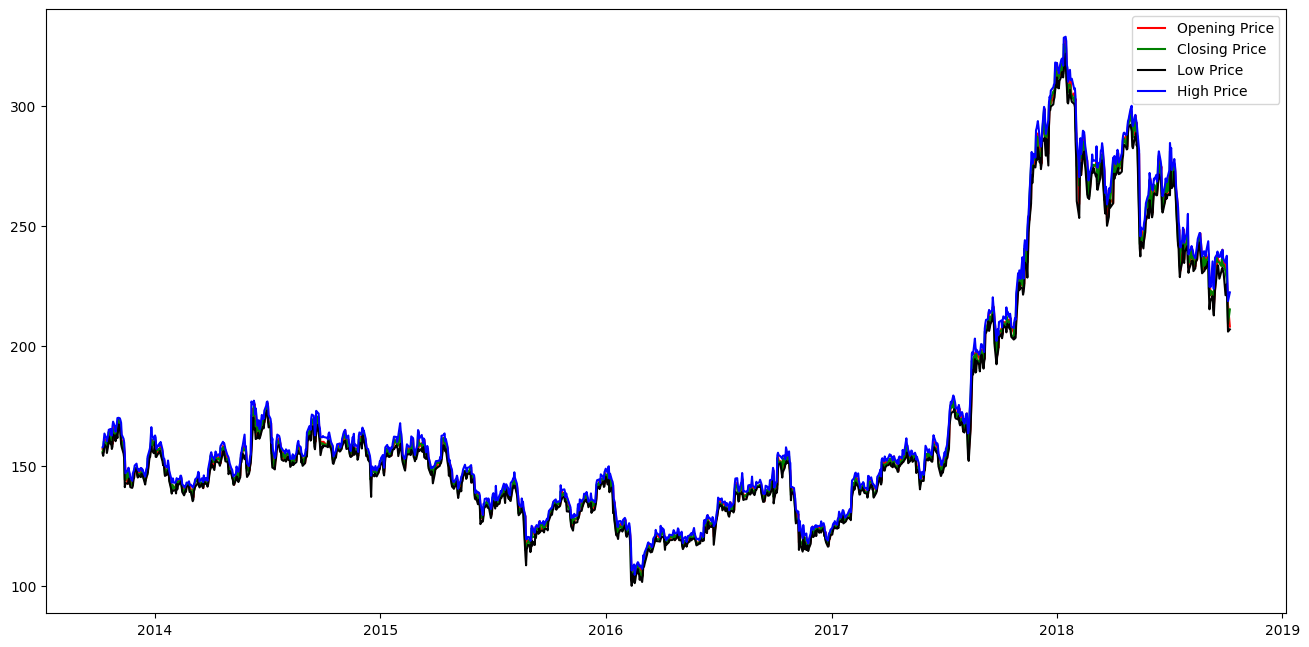

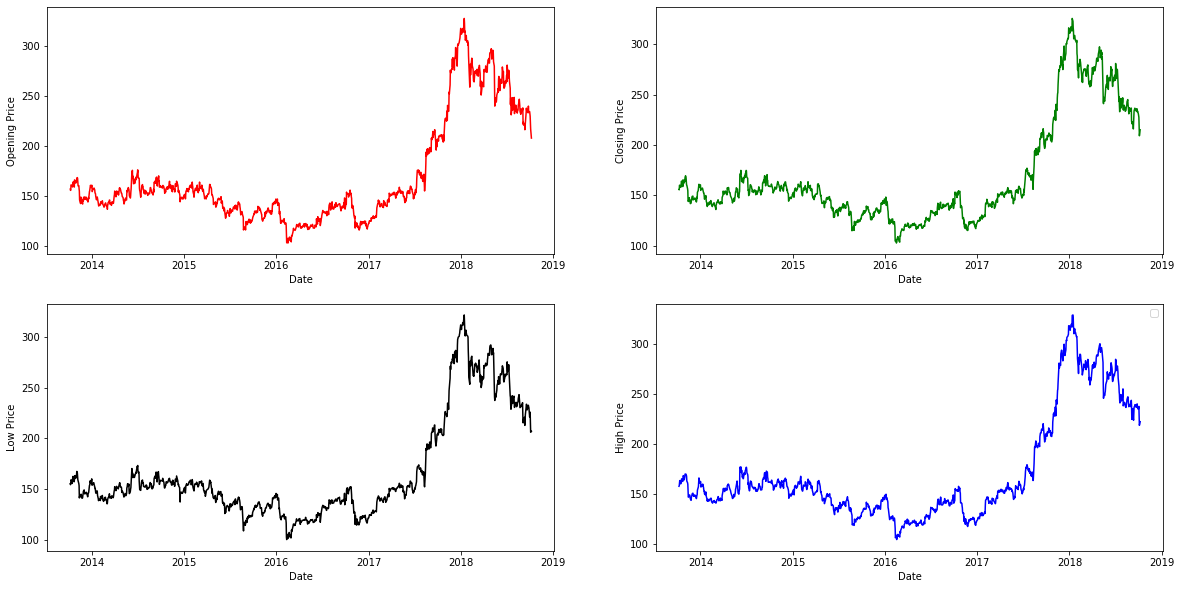

In [7]:
#plot Opening price, Closing price, Low price and High price with year
plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['Open'], color='red', label = 'Opening Price')
plt.plot(df['Close'], color='green', label = 'Closing Price')
plt.plot(df['Low'], color='black', label = 'Low Price')
plt.plot(df['High'], color='blue', label = 'High Price')
plt.legend(loc='best')

plt.subplots(2, 2, figsize = (20, 10))

ax1 = plt.subplot(2, 2, 1)
plt.plot(df['Open'], color='red')
plt.xlabel('Date')
plt.ylabel('Opening Price')

ax2 = plt.subplot(2, 2, 2)
plt.plot(df['Close'], color='green')
plt.xlabel('Date')
plt.ylabel('Closing Price')

ax3 = plt.subplot(2, 2, 3)
plt.plot(df['Low'], color='black')
plt.xlabel('Date')
plt.ylabel('Low Price')

ax4 = plt.subplot(2, 2, 4)
plt.plot(df['High'], color='blue')
plt.xlabel('Date')
plt.ylabel('High Price')

plt.legend(loc='best')

In [8]:
#a variable for predicting 'n' days into future
forecas_out=30
#create another column for target variable
df['Prediction'] = df[['Close']].shift(-forecas_out)
print(df.tail())

              Open    High     Low   Last   Close  Total Trade Quantity  \
Date                                                                      
2013-10-14  160.85  161.45  157.70  159.3  159.45             1281419.0   
2013-10-11  161.15  163.45  159.00  159.8  160.05             1880046.0   
2013-10-10  156.00  160.80  155.85  160.3  160.15             3124853.0   
2013-10-09  155.70  158.20  154.15  155.3  155.55             2049580.0   
2013-10-08  157.00  157.80  155.20  155.8  155.80             1720413.0   

            Turnover (Lacs)  Prediction  
Date                                     
2013-10-14          2039.09         NaN  
2013-10-11          3030.76         NaN  
2013-10-10          4978.80         NaN  
2013-10-09          3204.49         NaN  
2013-10-08          2688.94         NaN  


In [9]:
#create independent dataset(X)
X=np.array(df.drop(['Prediction'],1))
X=X[:-forecas_out]
#print(X)

In [10]:
#create dependent dataset(Y)
y=np.array(df['Prediction'])
y=y[:-forecas_out]
#print(y)

In [11]:
#split tha dataset 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [12]:
#apply linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#check the score
lr_confidence = lr.score(x_test,y_test)
print("lr confidence",lr_confidence)

lr confidence 0.8957380088681997


In [14]:
filename = 'finalized_model.pickle'  #creating a pickle model
pickle.dump(lr, open(filename, 'wb'))

In [15]:
loaded_model = pickle.load(open(filename, 'rb'))

In [16]:
#predicting using the loaded model
y_pred=loaded_model.predict(x_test)
x_pred=loaded_model.predict(x_train)

In [17]:
x_pred

array([125.23865478, 202.54433681, 146.86775112, 124.49791047,
       148.45283414, 136.92079998, 121.0398225 , 163.72122976,
       126.06016528, 130.42773782, 152.62619019, 141.72517417,
       134.67124472, 121.1090831 , 122.62943531, 151.29011908,
       280.23457104, 166.08557651, 243.67589745, 145.36728875,
       124.09157213, 120.50007581, 299.64062725, 156.28609927,
       143.78939838, 146.87423608, 261.67276526, 139.61673282,
       145.01987781, 154.99081036, 137.27497742, 132.99630552,
       141.70218543, 156.04382002, 134.93773312, 155.71460913,
       124.57331529, 202.41605124, 265.69316743, 141.94721284,
       161.24611001, 143.29222957, 137.06738958, 172.47243847,
       240.05201932, 126.34175636, 133.83392778, 122.60319786,
       234.89469119, 229.3383242 , 163.95378871, 180.78739569,
       256.2952431 , 265.7694137 , 235.01412032, 158.41226882,
       141.19208919, 239.70200384, 160.94443996, 161.84443349,
       153.58371548, 106.05698804, 156.48140961, 203.63

In [18]:
y_pred

array([285.99492489, 140.43474746, 155.86196631, 134.75790991,
       252.14118692, 141.57402091, 124.07489725, 159.16828001,
       150.8797462 , 136.46508548, 126.56712867, 135.31743476,
       140.58730592, 139.31380035, 146.54663745, 123.95096823,
       157.7368252 , 143.06891095, 123.05845336, 279.36988297,
       150.46453927, 263.77048389, 268.73119533, 152.29527631,
       162.38633288, 144.56038713, 120.39224959, 147.26957239,
       150.79204474, 198.51070584, 141.63190029, 155.78279895,
       120.99159461, 142.57931083, 144.51021927, 172.37155871,
       136.15620857, 233.35664679, 273.13461308, 127.47787107,
       150.97659988, 142.23139089, 257.12757897, 120.96907898,
       133.80733404, 141.16796847, 253.00234254, 130.26774516,
       128.83540536, 144.4851634 , 138.91387512, 156.00790643,
       156.31918459, 138.04178044, 138.14679387, 144.35549195,
       281.85076804, 143.3784671 , 273.48317749, 138.62910991,
       143.37568593, 152.99569949, 147.33776931, 159.97

In [19]:
print(loaded_model.score(x_test,y_test))

0.8957380088681997


In [20]:
print(loaded_model.score(x_train,y_train))

0.8788538919454915


In [21]:
print(loaded_model.score(x_test,y_pred))

1.0


In [22]:
print(loaded_model.score(x_train,x_pred))

1.0


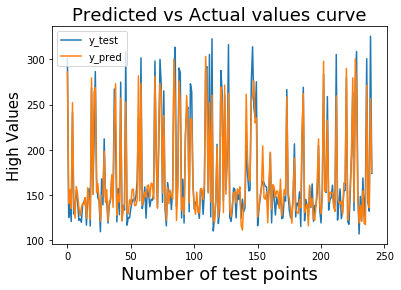

In [23]:
plt.plot(y_test,label='y_test')
plt.plot(y_pred,label='y_pred')
plt.title('Predicted vs Actual values curve',fontsize='18')
plt.legend()
plt.xlabel('Number of test points',fontsize='18')
plt.ylabel('High Values',fontsize='15')
plt.show()